# Gender wage gap report

This is an exploratory data analysis into a dataset of information on the gender wage gap in 26 countries, collected by the OECD.  
**Link to dataset**: https://data.oecd.org/earnwage/gender-wage-gap.htm. 
**Citation**: OECD (2024), Gender wage gap (indicator). doi: 10.1787/7cee77aa-en (Accessed on 04 January 2024).

Below is a dataframe containing the dataset. This provides an overview of all of the columns 19 columns included, and shows us that there are 859 rows.

In [13]:
import pandas as pd

# Create dataframe from gender wage gap dataset csv file
df = pd.read_csv('GENDER_EMP.csv')
df

,COU,Country,IND,Indicator,SEX,Sex,AGE,Age Group,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2000,2000,NaN,NaN,0,Units,NaN,NaN,9.8,NaN,NaN
1,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2005,2005,NaN,NaN,0,Units,NaN,NaN,2.0,NaN,NaN
2,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2010,2010,NaN,NaN,0,Units,NaN,NaN,5.5,NaN,NaN
3,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2015,2015,NaN,NaN,0,Units,NaN,NaN,7.5,NaN,NaN
4,AUS,Australia,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2016,2016,NaN,NaN,0,Units,NaN,NaN,10.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,POL,Poland,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2020,2020,NaN,NaN,0,Units,NaN,NaN,-2.6,NaN,NaN
855,PRT,Portugal,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2019,2019,NaN,NaN,0,Units,NaN,NaN,-3.6,NaN,NaN
856,SVK,Slovak Republic,EMP9_1,Gender wage gap at 1st decile (bottom),ALL_PERSONS,All persons,TOTAL,Total,2022,2022,NaN,NaN,0,Units,NaN,NaN,4.0,NaN,NaN
857,SVK,Slovak Republic,EMP9_9,Gender wage gap at 9th decile (top),ALL_PERSONS,All persons,TOTAL,Total,2022,2022,NaN,NaN,0,Units,NaN,NaN,21.4,NaN,NaN


## Data cleaning and pre-processing

Let's keep only the neccessary columns: Country, Indicator, Time, Value. We only need specifically Gender wage gap at median data from 2015, so lets also keep only rows with the Gender wage gap at median indicator, from 2015.

In [14]:
df = df[['Country','Indicator','Time','Value']]
df = df[(df['Time']==2015) & (df['Indicator']== 'Gender wage gap at median')]
df

,Country,Indicator,Time,Value
362,Australia,Gender wage gap at median,2015,13.3
369,Austria,Gender wage gap at median,2015,17.0
376,Belgium,Gender wage gap at median,2015,4.7
382,Canada,Gender wage gap at median,2015,18.7
389,Czechia,Gender wage gap at median,2015,16.5
396,Denmark,Gender wage gap at median,2015,5.8
403,Finland,Gender wage gap at median,2015,18.1
411,Germany,Gender wage gap at median,2015,16.1
420,Hungary,Gender wage gap at median,2015,9.5
429,Japan,Gender wage gap at median,2015,25.7


The Indicator and Time Columns are now redundant, so we can remove them. Also the OECD - Average row needs to be removed, because we only want the data for individual contries.

In [15]:
df = df[['Country','Value']]
df = df[(df['Country'] != 'OECD - Average')]
df

,Country,Value
362,Australia,13.3
369,Austria,17.0
376,Belgium,4.7
382,Canada,18.7
389,Czechia,16.5
396,Denmark,5.8
403,Finland,18.1
411,Germany,16.1
420,Hungary,9.5
429,Japan,25.7


## Data visualisation

Now that the data has been cleaned, we can create visualisations.
The bar chart below shows the median gender wage gap (2015) in each country, in ascending order. This allows us to quickly view which countries had the smallest wage gaps, and which had the largest wage gaps.

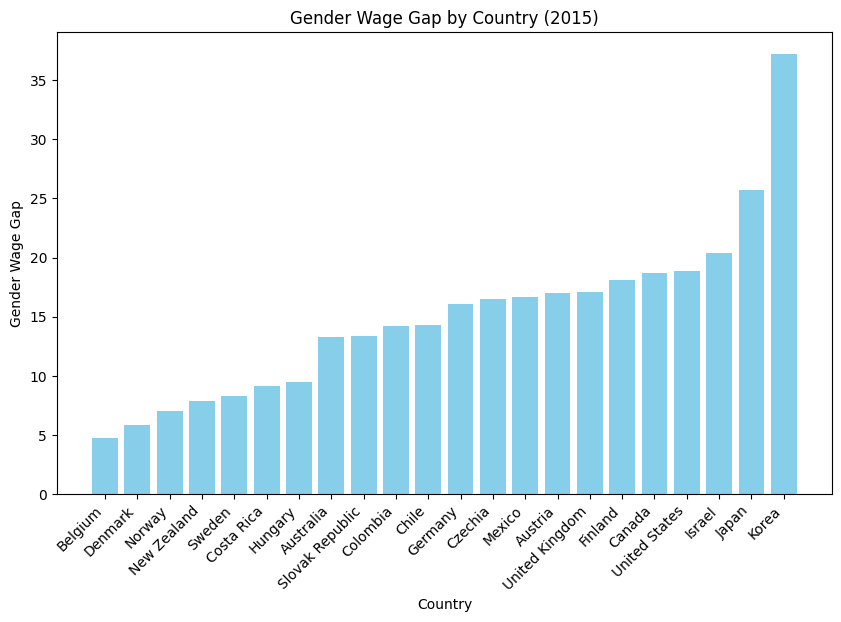

In [21]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by='Value')
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Country'], df_sorted['Value'], color='skyblue')
plt.title(f'Gender Wage Gap by Country (2015)')
plt.xlabel('Country')
plt.ylabel('Gender Wage Gap')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

This bar chart shows how the three countries with the smallest Gender wage gap were Belgium, Denmark and Norway. Conversly, the three countries with the largest gender wage gap were Korea, Japan and Isreal.